<a href="https://colab.research.google.com/github/AnnLivio/data_Visualization/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME TO THE NOTEBOOK
---
In this Notebook we are going to apply different data visualization techniques for time series analysis.

The dataset: Average daily temprature of different cities around globe from 1995 to 2020


#### Agenda:
    Task1: Importing our dataset
    Task2: Data Preprocessing
    Task3: Analysing global temperature from 1995 to 2019
    Task4: Comparing yearly average temperature of different regions over time
    Task5: Monthly average temperature in Canada

----

Importing modules

In [1]:
import pandas as pd

import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


Load the dataset

In [2]:
data = pd.read_csv("/content/dataset_ts.csv", low_memory=False)
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


The Dataset That we are going to work with is a ***Geo-Spatial Time-Series Dataset***

#### What is our dataset representing?
**Geo-Spatial**: Data represents that **Something** has happend **somewhere**! <br>
**Time-Series**: Data represents that **Something** has happend **at a specific time**! <br>
<br>
**Geo-Spatial Time-Series Dataset**: Data represents that **Something** has happend **somewhere** **at a specific time**!


### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

In [4]:
# Get some statistics
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Month,Day,Year,AvgTemperature
count,2906327.00000,2906327.00000,2906327.00000,2906327.00000
mean,6.46916,15.71682,2006.62391,56.00492
std,3.45649,8.80053,23.38226,32.12359
min,1.00000,0.00000,200.00000,-99.00000
25%,3.00000,8.00000,2001.00000,45.80000
50%,6.00000,16.00000,2007.00000,62.50000
75%,9.00000,23.00000,2013.00000,75.50000
max,12.00000,31.00000,2020.00000,110.00000


## Task 2: Preprocessing

#### Get only the columns we need

In [5]:
# Remove the column State
data.drop('State', axis=1, inplace=True)
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


Convert fahrenheit to celsius

In [6]:
# Convert AvgTemperature from F to C
data['AvgTemperature'] = round((data.AvgTemperature -32) * 5/9,1)
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8


Let's find the outliers

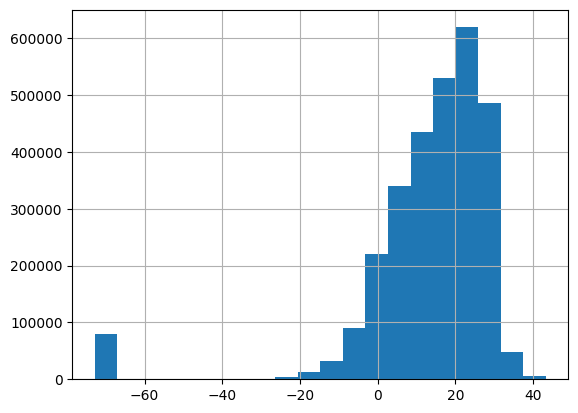

In [7]:
# Use a histogram to observe outliers
data.AvgTemperature.hist(bins=20)
plt.show()

Removing the outliers

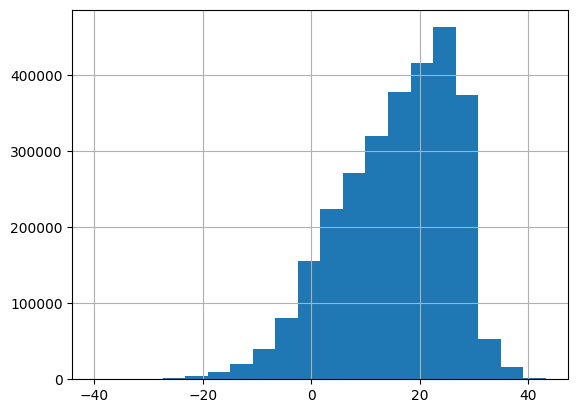

In [8]:
# Delete outliers
data = data[data.AvgTemperature > -40]
data.AvgTemperature.hist(bins=20)
plt.show()

Sort values by Year, Month and Day Column to see the time range of our data

In [9]:
data.sort_values(by=['Year', 'Month', 'Day'], inplace=True)
data

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
13809,Africa,Benin,Cotonou,1,1,1995,27.3
23075,Africa,Central African Republic,Bangui,1,1,1995,24.1
32341,Africa,Congo,Brazzaville,1,1,1995,26.6
41606,Africa,Egypt,Cairo,1,1,1995,15.1
...,...,...,...,...,...,...,...
2862479,North America,US,Green Bay,5,13,2020,3.6
2871744,North America,US,Madison,5,13,2020,7.6
2881009,North America,US,Milwaukee,5,13,2020,5.1
2890274,North America,US,Casper,5,13,2020,12.3


We don't have 2020 data completely, so let's just remove them from our dataset

In [10]:
# Drop 2020 records
data = data[data.Year != 2020]

## Task 3: Global temperature from 1995 to 2019
    - Aggregating our data based on the year
    - plot our data in a line chart

In [11]:
data_byyear = data.groupby('Year')['AvgTemperature'].mean().reset_index()

Let's draw a line chart for this data

In [12]:
fig = px.line(data_byyear, x='Year', y='AvgTemperature',
          title='Global Average Temperature by Year')
fig.update_xaxes(dtick='Year')
fig.show()

### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

### Overall Trend Analysis
Let's fit a linear line to our plot using numpy and Linear Regression

In [14]:
# Get m and c for y = mx + c
m , c = np.polyfit(data_byyear.Year, data_byyear.AvgTemperature, 1)
print(f'm = {m}, c = {c}')

line = m * data_byyear.Year + c

# Add line to the previous fig
fig.add_trace(go.Scatter(x=data_byyear.Year, y=line, name='Linear Regression'))
fig.show()

m = 0.045100895568684636, c = -74.69704936195637


### Bar chart vs Line chart
Let's compare Bar chart and Line chart in terms of the tasks we can solve using each of them

Time Series tasks:

    1- Overall trend analysis
    2- Key Moments
    3- Outliers

Let's plot a bar chart for the same data

In [15]:
px.bar(data_byyear, x='Year', y='AvgTemperature',
          title='Global Average Temperature by Year', color='AvgTemperature')

### Task 4: Let's compare yearly average temperature of different regions over time

In [16]:
# Get the distinct Region values
data.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [18]:
data_region = data.groupby(['Region', 'Year'])['AvgTemperature'].mean().reset_index()
data_region.head()

,Region,Year,AvgTemperature
0,Africa,1995,23.272222
1,Africa,1996,23.085704
2,Africa,1997,23.023177
3,Africa,1998,23.193769
4,Africa,1999,23.274374


In [19]:
fig_r = px.line(data_region, x='Year', y='AvgTemperature', color='Region',
          title='Yearly Average Temperature of Different Regions')
fig_r.update_xaxes(dtick='Year')
fig_r.show()

### Task 5: Monthly average temperature in Canada

In [20]:
# Create a Subset for Canada
data_canada = data[data.Country == 'Canada']

# Group data by Month and Year and get the mean
data_canada.groupby(['Month','Year'])['AvgTemperature'].mean().reset_index()

,Month,Year,AvgTemperature
0,1,1995,-7.017419
1,1,1996,-12.089677
2,1,1997,-10.982581
3,1,1998,-8.588065
4,1,1999,-8.954000
...,...,...,...
295,12,2015,-4.191667
296,12,2016,-10.295161
297,12,2017,-10.885484
298,12,2018,-8.438710


Creating a date column with this format ***MONTH/YEAR***

In [21]:
# Create a column Date with Month and Year
data_canada['Date'] = data_canada['Month'].astype(str) + '/' + data_canada['Year'].astype(str)
data_canada.head()

<ipython-input-21-51def35be3ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Country,City,Month,Day,Year,AvgTemperature,Date
1130116,North America,Canada,Calgary,1,1,1995,-10.8,1/1995
1137216,North America,Canada,Edmonton,1,1,1995,-12.5,1/1995
1144612,North America,Canada,Halifax,1,1,1995,-2.8,1/1995
1151713,North America,Canada,Montreal,1,1,1995,-6.7,1/1995
1157426,North America,Canada,Ottawa,1,1,1995,-6.3,1/1995


Let's plot a bar chart to analyse this data

In [23]:
fig_c = px.bar(data_canada, x='Date', y='AvgTemperature',
          title='Monthly Average Temperature in Canada', color='Month')
fig_c.show()

### Let's use a Box Plot for analyzing the same data

This is a better way to visualize the data by month.

In [24]:
px.box(data_canada, 'Month', 'AvgTemperature', title='Monthly Average Temperature in Canada', color='Month')